# Graphs for mid year report

In [19]:
import pandas as pd
from plotly import graph_objs as go
import plotly.express as px

In [21]:
# Load the annotations data
df = pd.read_csv('annotations.csv')

# Define the label columns (excluding silence)
label_cols = ['plane', 'biophony']

# Group by hour and sum the labels
hourly_counts = df.groupby('hour')[label_cols].sum().reset_index()

# Reshape data for heatmap (labels as rows, hours as columns)
heatmap_data = hourly_counts.set_index('hour')[label_cols].T

# Create the density heatmap
fig = go.Figure(data=go.Heatmap(
    z=heatmap_data.values,
    x=list(range(24)),  # All 24 hours
    y=label_cols,
    colorscale='Viridis',
    colorbar=dict(title='Count', tickfont=dict(size=14)),
    hoverongaps=False
))

fig.update_layout(
    height=300,
    title=dict(text='Label Distribution Across 24 Hours', font=dict(size=20)),
    xaxis_title=dict(text='Hour of Day', font=dict(size=16)),
    yaxis_title=dict(text='Label Type', font=dict(size=16)),
    xaxis=dict(
        tickmode='linear',
        tick0=0,
        dtick=1,
        tickfont=dict(size=14)
    ),
    yaxis=dict(
        tickfont=dict(size=14)
    )
)

fig.show()

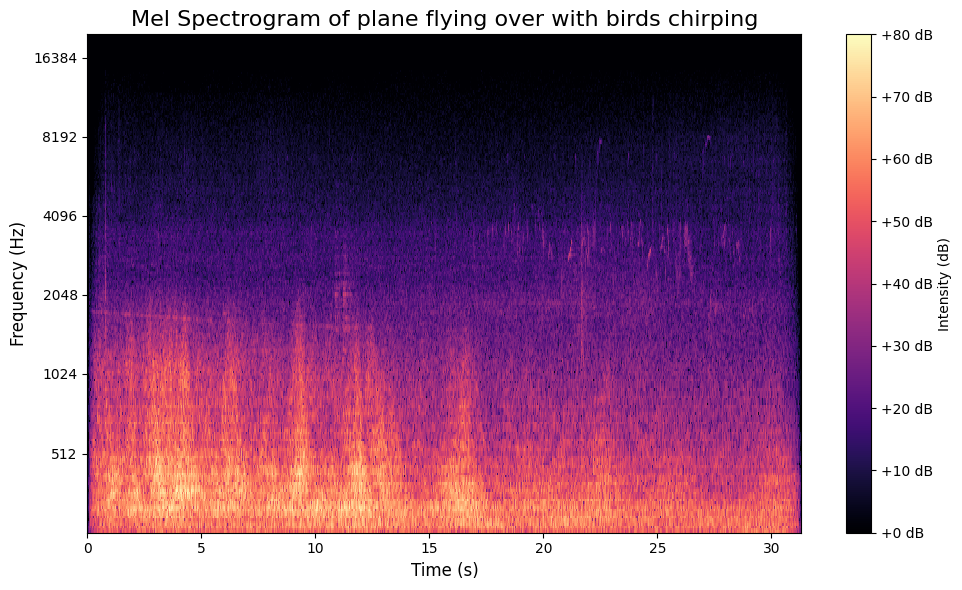

In [11]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load single audio file (no bird mixture)
y, sr = librosa.load(
    "airplane-flyover-with-birds-29495.mp3", sr=None
)

# change n_mels and restrict display to bird region
n_mels = 256
S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=256, n_mels=n_mels, fmin=20, fmax=sr//2)
S_db = librosa.power_to_db(S, ref=np.max) + 80  # Shift dB scale to start from 0

# Plot mel spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(S_db, sr=sr, hop_length=256, x_axis='time', y_axis='mel', fmin=20, fmax=20000, cmap='magma')  # Correct x-axis to time
plt.colorbar(format='%+2.0f dB', label='Intensity (dB)')  # Display intensity legend
plt.title('Mel Spectrogram of plane flying over with birds chirping', fontsize=16)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Frequency (Hz)', fontsize=12)
plt.tight_layout()
plt.show()